# Spec_Tools Tutorial

This is a small showcase of all the tools in the spec_tools python package which should aid the analysis of IR spectra using Python

# Modules

-spectra_plot a variety of functions to plot an visualize
-baseline_fitting contains some methode for the fitting of baselines to a given spectrum



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pybaselines import Baseline, utils
from modules import spec_tools, spectra_plotting

# Tutorial: How to Plot Spectra

First one needs to load in data from a csv file for this, one can use the **data_read_csv()** function

In [2]:
data, data_np = spec_tools.data_read_csv("shee2.csv",sep=";",comma=",")

print(data_np.shape)

(57816, 4)


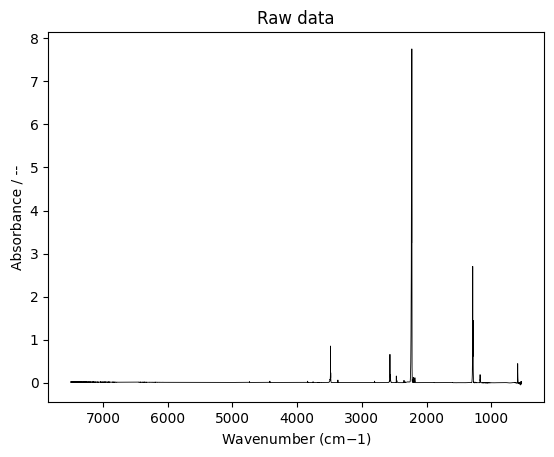

NameError: name 'x' is not defined

In [ ]:
spectra_plotting.plot_spectra(data_np[:,0],data_np[:,1],title="Raw data")


In [ ]:
def plot_multiple_spectral_window(x,y,spectral_windows title):
    """ 
    Plots multiple selected spectral windows in a side by side plot


    Attr:
        x (np.array): x values of the spectra
        y_spectral_windows (list): list of np.arrays with the y values of the spectral windows

    """